In [1]:
cd ..

C:\Users\qlab\Documents\GitHub\pycontrol


In [2]:
from experiments.Field_Switching import FieldSwitchingExperiment, extract_data
from pycontrol.filters.io import WriteToHDF5
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [10]:
exp = FieldSwitchingExperiment()
exp.sample = "CSHE-2 C4R7"
exp.comment = "Field Sweep"
wr = WriteToHDF5("data\CSHE-Switching\CSHE-Die2-C4R7\CSHE2-C4R7-FieldSwitch_2016-06-24.h5")
edges = [(exp.resistance, wr.data)]
exp.set_graph(edges)
exp.init_instruments()

fields = np.linspace(-0.005,0.03,50)
fields = np.append(fields, np.flipud(fields))
main_sweep = exp.add_sweep(exp.field,fields)
exp.run_sweeps()
exp.shutdown_instruments()

In [11]:
field, res = extract_data(wr.filename)

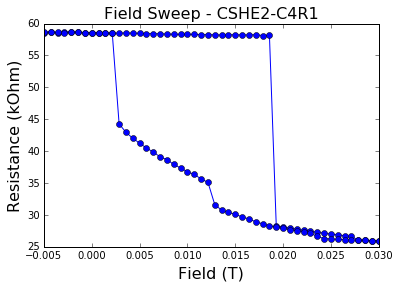

In [12]:
fig = plt.figure()
plt.plot(field, res/1e3,'-o')
plt.xlabel('Field (T)', size=16)
plt.ylabel('Resistance (kOhm)', size=16)
plt.title('Field Sweep - CSHE2-C4R1', size=16)
plt.show()

In [ ]:
# Estimate TMR
mid = np.mean(res)
TMR = (np.max(res)-np.min(res))/np.min(res)

# Coercivity
